<a href="https://colab.research.google.com/github/kaif0312/ArcanaHackathon/blob/main/Arcana_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/financeapp/bq-results-20230414-205924-1681505974800.csv",index_col='ds', parse_dates=['ds'])
df2=pd.read_csv("/content/drive/MyDrive/financeapp/bq-results-20230414-210045-1681506054580.csv",index_col='ds', parse_dates=['ds'])
df3=pd.read_csv("/content/drive/MyDrive/financeapp/bq-results-20230414-210330-1681506224804.csv",index_col='ds', parse_dates=['ds'])
df4=pd.read_csv("/content/drive/MyDrive/financeapp/bq-results-20230414-210455-1681506313730.csv",index_col='ds', parse_dates=['ds'])
df5=pd.read_csv("/content/drive/MyDrive/financeapp/bq-results-20230414-210630-1681506404411.csv",index_col='ds', parse_dates=['ds'])
df6=pd.read_csv("/content/drive/MyDrive/financeapp/bq-results-20230414-210836-1681506532204.csv",index_col='ds', parse_dates=['ds'])
df7=pd.read_csv("/content/drive/MyDrive/financeapp/bq-results-20230414-214948-1681509023746.csv",index_col='ds', parse_dates=['ds'])

KeyboardInterrupt: ignored

# New Section

In [ ]:
merged_df = pd.concat([df1, df2,df3,df4,df5,df6,df7])
merged_df.head()

In [ ]:
merged_df.shape

In [ ]:
merged_df = merged_df.drop_duplicates()
print(merged_df.shape)

In [ ]:
value_counts = merged_df['symbol'].value_counts()
value_counts.nlargest(10)

RR.L      8500
SGRO.L    8489
TW.L      8478
BA.L      8471
PEP       8385
AAPL      8385
COST      8385
CL        8385
MDT       8385
ADP       8385
Name: symbol, dtype: int64

In [ ]:
data= merged_df[merged_df['symbol'].isin(['AAPL', 'MSFT','PG','GOOG','VITSX','VTSAX','TSLA','JNJ','NVDA','KO'])]

value_counts = data['symbol'].value_counts()
print(value_counts)

KO      8385
AAPL    8385
JNJ     8385
MSFT    8385
PG      8384
NVDA    6096
GOOG    4695
TSLA    3220
Name: symbol, dtype: int64


In [ ]:
data_sorted = data.sort_values(['symbol','ds'], ascending=[True,True])
data_sorted.shape

(55935, 3)

In [ ]:
data = data_sorted.groupby('symbol')

In [ ]:
print(data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f5770282790>>


In [ ]:
for group_name, group_df in data:
    # Save each group to a separate csv file with the name "group_name.csv"
    group_df.to_csv(f'content/drive/MyDrive/BESTCOMPANIES//{group_name}.csv', index=True)

In [ ]:
data_csv=data_sorted.to_csv('data.csv', index=True)

In [ ]:
print(data_sorted.shape)

(8071, 3)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/AAPL.csv')

In [ ]:
df.head()

,ds,symbol,close,volume
0,1990-01-02,AAPL,0.332589,183198400.0
1,1990-01-03,AAPL,0.334821,207995200.0
2,1990-01-04,AAPL,0.335938,221513600.0
3,1990-01-05,AAPL,0.337054,123312000.0
4,1990-01-08,AAPL,0.339286,101572800.0


In [ ]:
df.set_index('ds', inplace=False)

KeyError: ignored

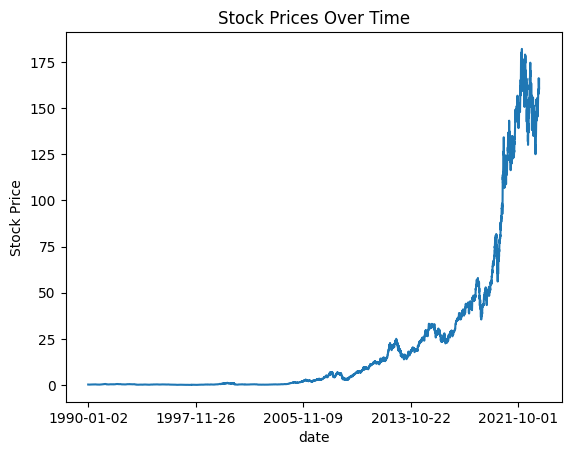

In [ ]:
df['close'].plot()
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.show()

<Axes: >

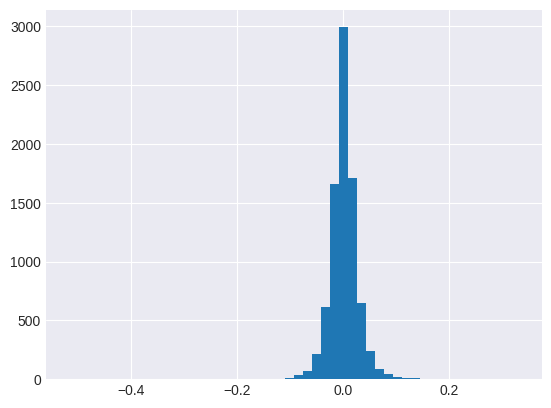

In [ ]:
# Calculate daily returns
df['returns'] = df['close'].pct_change()

# Plot the distribution of returns
df['returns'].hist(bins=50)

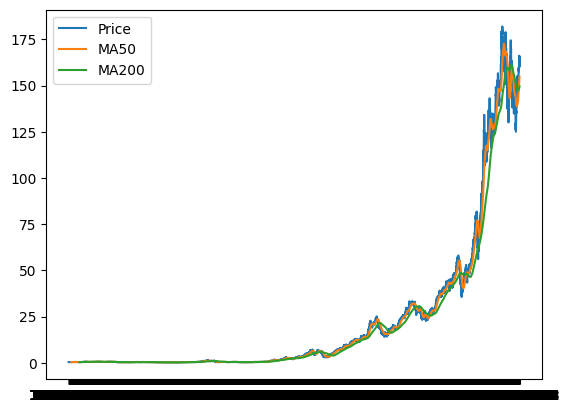

In [ ]:
# Calculate the 50-day moving average
df['ma50'] = df['close'].rolling(window=50).mean()

# Calculate the 200-day moving average
df['ma200'] = df['close'].rolling(window=200).mean()

# Plot the moving averages and the stock price
plt.plot(df['close'])
plt.plot(df['ma50'])
plt.plot(df['ma200'])

# Add a legend
plt.legend(['Price', 'MA50', 'MA200'])


In [ ]:
print(df.head())

           symbol     close       volume   returns  ma50  ma200
ds                                                             
1990-01-02   AAPL  0.332589  183198400.0       NaN   NaN    NaN
1990-01-03   AAPL  0.334821  207995200.0  0.006711   NaN    NaN
1990-01-04   AAPL  0.335938  221513600.0  0.003336   NaN    NaN
1990-01-05   AAPL  0.337054  123312000.0  0.003322   NaN    NaN
1990-01-08   AAPL  0.339286  101572800.0  0.006622   NaN    NaN


<ipython-input-162-67aefbf1fdeb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['ma50'] = df_2['close'].rolling(window=50).mean()
<ipython-input-162-67aefbf1fdeb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['ma200'] = df_2['close'].rolling(window=200).mean()


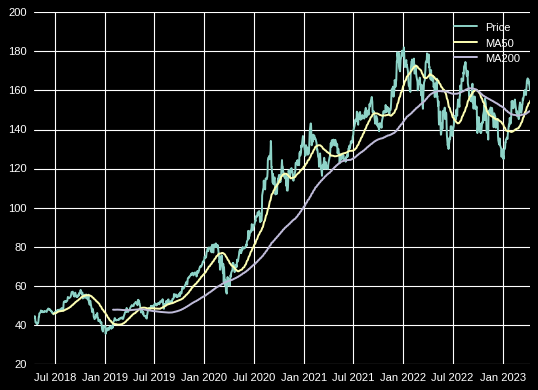

In [ ]:
# Convert date column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Filter the dataframe to include only data from the last 2 years
df_2 = df[df['ds'] >= pd.Timestamp('now') - pd.DateOffset(years=5)]

# Set the date column as the index
df_2.set_index('ds', inplace=True)
# Calculate the 50-day moving average
df_2['ma50'] = df_2['close'].rolling(window=50).mean()

# Calculate the 200-day moving average
df_2['ma200'] = df_2['close'].rolling(window=200).mean()
plt.style.use("dark_background")

# Plot the moving averages and the stock price
plt.plot(df_2['close'])
plt.plot(df_2['ma50'])
plt.plot(df_2['ma200'])

# Add a legend
plt.legend(['Price', 'MA50', 'MA200'])


<ipython-input-25-0fa8b0ddfb82>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr()


0.9579452463386854
0.14400070967761952


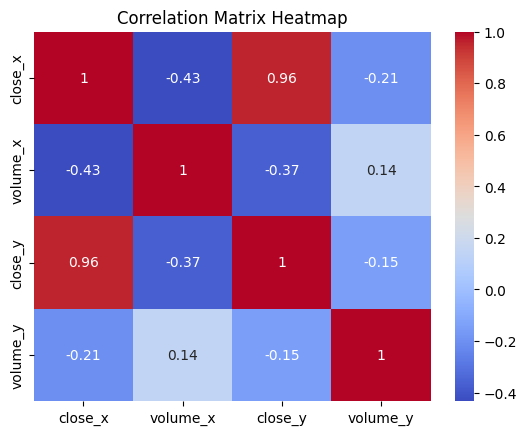

In [ ]:
# Read in another CSV file containing asset prices
apple = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/AAPL.csv')
nvdia = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/NVDA.csv')
google = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/GOOG.csv')
# Merge the two dataframes on the date column
merged_df = pd.merge(apple, nvdia, on='ds')
# Calculate the correlation between the stock and other assets
correlations = merged_df.corr()

# Print the correlations
#print(correlations)
sns.heatmap(correlations, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix Heatmap')
print(correlations.loc['close_x', 'close_y'])
print(correlations.loc['volume_x','volume_y'])


For volatility analysis

In [ ]:
# Calculate the annualized volatility
# Convert date column to datetime format
nvdia['ds'] = pd.to_datetime(nvdia['ds'])
# Filter the dataframe to include only data from the last 2 years
df_2 = nvdia[nvdia['ds'] >= pd.Timestamp('now') - pd.DateOffset(years=1)]
print(df_2)
volatility = df_2['close'].std() * np.sqrt(249)
print(df_2.shape)
print(f"Volatility: {volatility:.2%}")

             ds symbol   close      volume
5847 2022-04-18   NVDA  217.83  52570061.0
5848 2022-04-19   NVDA  221.98  51270658.0
5849 2022-04-20   NVDA  214.82  46897444.0
5850 2022-04-21   NVDA  201.83  65610344.0
5851 2022-04-22   NVDA  195.15  62416343.0
...         ...    ...     ...         ...
6091 2023-04-06   NVDA  270.37  38471797.0
6092 2023-04-10   NVDA  275.79  37976103.0
6093 2023-04-11   NVDA  271.69  30215422.0
6094 2023-04-12   NVDA  264.95  44347329.0
6095 2023-04-13   NVDA  264.63  35249730.0

[249 rows x 4 columns]
(249, 4)
Volatility: 63196.79%


For volume analysis

In [ ]:
apple['ds'] = pd.to_datetime(apple['ds'])

# filter data based on time period of interest
start_date = '2020-01-01'
end_date = '2022-04-15'
df_filtered = apple[(apple['ds'] >= start_date) & (apple['ds'] <= end_date)]

# calculate average volume for the time period
avg_volume = df_filtered['volume'].mean()

print(f"Average volume for the time period from {start_date} to {end_date}: {avg_volume:.2f}")


Average volume for the time period from 2020-01-01 to 2022-04-15: 120136721.22


For regression of data to predict future datapoints

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from pandas import datetime

<ipython-input-166-cb449efdc986>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BESTCOMPANIES/NVDA.csv')
df['ds'] = pd.to_datetime(df['ds'])
# Filter the dataframe to include only data from the last 2 years
df = df[df['ds'] >= pd.Timestamp('now') - pd.DateOffset(years=2)]
# Convert the date column to a datetime object
df['ds'] = pd.to_datetime(df['ds'])

# Set the date column as the index
df.set_index('ds', inplace=True)

train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
train_data = train_data['close'].values
test_data = test_data['close'].values
history = [x for x in train_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 48.88140541020461


[134.16, 134.84, 133.11, 133.5, 131.94, 134.32, 134.72, 134.39, 133.58, 133.48, 131.46, 132.54, 127.85, 128.1, 129.74, 130.21, 126.85, 125.91, 122.77, 124.97, 127.45, 126.27, 124.85, 124.69, 127.31, 125.43, 127.1, 126.9, 126.85, 125.28, 124.61, 124.28, 125.06, 123.54, 125.89, 125.9, 126.74, 127.13, 126.11, 127.35, 130.48, 129.64, 130.15, 131.79, 130.46, 132.3, 133.98, 133.7, 133.41, 133.11, 134.78, 136.33, 136.96, 137.27, 139.96, 142.02, 144.57, 143.24, 145.11, 144.5, 145.64, 149.15, 148.48, 146.39, 142.45, 146.15, 145.4, 146.8, 148.56, 148.99, 146.77, 144.98, 145.64, 145.86, 145.52, 147.36, 146.95, 147.06, 146.14, 146.09, 145.6, 145.86, 148.89, 149.1, 151.12, 150.19, 146.36, 146.7, 148.19, 149.71, 149.62, 148.36, 147.54, 148.6, 153.12, 151.83, 152.51, 153.65, 154.3, 156.69, 155.11, 154.07, 148.97, 149.55, 148.12, 149.03, 148.79, 146.06, 142.94, 143.43, 145.85, 146.83, 146.92, 145.37, 141.91, 142.83, 141.5, 142.65, 139.14, 141.11, 142.0, 143.29, 142.9, 142.81, 141.51, 140.91, 143.76, 1

[192.7072321814087, 196.66709909191803, 209.2456997425702, 217.42810176608842, 210.44934995487978, 211.3843049989927, 222.62368528821327, 222.86096947040323, 223.9958233101014, 212.88145602966313, 219.6227748273428, 229.483948060695, 227.56303912909152, 219.90813862467851, 214.57947537437187, 208.16516861828677, 208.41420545606724, 235.55182525763948, 229.79419925577702, 234.5274219282313, 230.8991179805127, 229.93898369138273, 234.44973261177603, 239.1747781800722, 235.59262613671132, 232.76467393723436, 242.06010821230237, 234.667528656636, 230.7287584288002, 229.55051245599049, 241.186667866187, 241.13779088015738, 254.54833597354397, 255.66575942541084, 259.8428993767439, 262.2881021649818, 266.08948091847293, 272.82964884640666, 268.24280760406987, 266.5834960695312, 264.8773977884869, 271.0031415472139, 273.6410120123654, 277.45698060999246, 279.15586460584143, 274.9634113622253, 269.9428880852814, 271.46886162420225, 276.257944664923, 271.372049154062, 264.8156467924286]


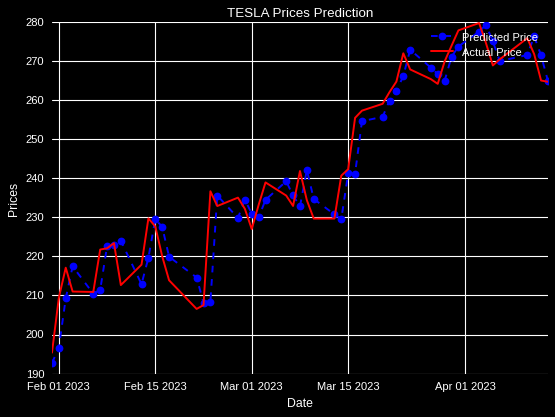

In [ ]:
test_set_range = df[int(len(df)*0.9):].index
print(model_predictions)
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

In [ ]:
last_date = df.index[-1]
print(last_date)

2023-04-13 00:00:00


[264.81564679 264.97929625 265.34944087 265.25935219 264.46716171
 264.01596128 263.80960407 263.71287627 263.65119516 263.5339138 ]
2023-04-13    264.815647
2023-04-14    264.979296
2023-04-15    265.349441
2023-04-16    265.259352
2023-04-17    264.467162
2023-04-18    264.015961
2023-04-19    263.809604
2023-04-20    263.712876
2023-04-21    263.651195
2023-04-22    263.533914
Freq: D, dtype: float64
          ds       close
0 2023-04-13  264.815647
1 2023-04-14  264.979296
2 2023-04-15  265.349441
3 2023-04-16  265.259352
4 2023-04-17  264.467162
5 2023-04-18  264.015961
6 2023-04-19  263.809604
7 2023-04-20  263.712876
8 2023-04-21  263.651195
9 2023-04-22  263.533914


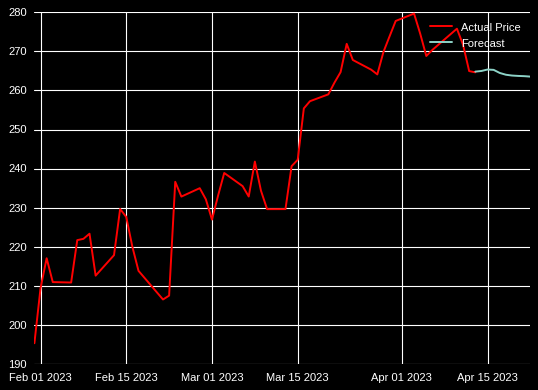

In [ ]:
n_periods = 30  # Number of future points to forecast
forecast= model_fit.forecast(steps=10)

# Print the forecasted values
print(forecast)
forecast_series = pd.Series(forecast, index=pd.date_range(start=last_date, periods=10))
print(forecast_series)
df = pd.DataFrame({'ds': forecast_series.index, 'close': forecast_series.values})
# Plot the actual and forecasted data
print(df)
df.to_csv('series_data.csv', index=False)
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.plot(forecast_series, label='Forecast')
plt.legend()
plt.show()


In [ ]:
A = np.random.randn(4,3)

B = np.sum(A, axis = 1, keepdims = True) 
B.shape

(4, 1)